# CSE 572: Lab 7

In this lab, you will practice implementing a logistic regression classifier from scratch and using Scikit-learn.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button. 

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, click File > Print > Save as PDF.

## Logistic regression from scratch

### Create toy dataset

Below we create a toy dataset using the `make_classification()` function from Scikit-learn. You can read more about the arguments used to create the dataset in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html).

In [78]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)

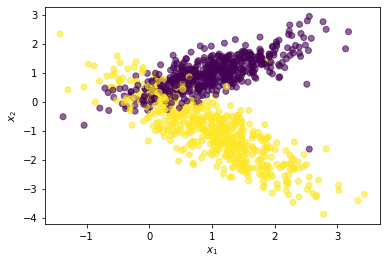

In [79]:
# Plot the dataset
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
ax.scatter(X[:,0], X[:,1], c=y, alpha=0.6)
ax.set_xlabel('$x_1$');
ax.set_ylabel('$x_2$');

### Standardize the feature values in the dataset

Standardize the input features by subtracting the feature-wise mean and dividing by the feature-wise standard deviation.

In [80]:
# Standardize the inputs
import numpy as np

# YOUR CODE HERE
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

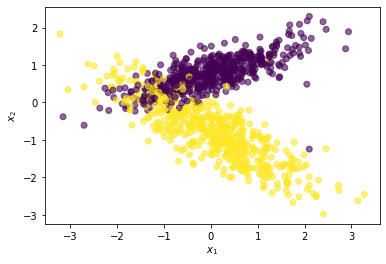

In [81]:
# Plot the dataset after standardizing
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
ax.scatter(X[:,0], X[:,1], c=y, alpha=0.6)
ax.set_xlabel('$x_1$');
ax.set_ylabel('$x_2$');

### Define the logistic function

Write a function that returns the output of the logistic function. Write the code for the equation (do not use a library to import the function).

In [82]:
def sigmoid(z):
    # YOUR CODE HERE
    return 1 / (1 + np.exp(-z))

### Define the loss function

Recall that the loss function for logistic regression is the log loss or cross-entropy function, which we will average over the samples:

$L= \frac{1}{n} \sum_{i=1}^{n} L(\hat{y}_i, y_i) = -\frac{1}{n} \sum_{i=1}^{n} [(y_i\log(\hat{y_i}) + (1-y_i)\log(1-\hat{y_i})] $

The below function returns the cross entropy loss given a set of class labels $y$ and the predicted classes $\hat{y}$. Write the equation for cross entropy loss in the function (do not use a library to import the function).

In [83]:
def loss(y, y_hat):
    # YOUR CODE HERE
    return -np.sum((y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat))) / y.shape[0]

### Calculate the gradients

For gradient descent, we need to calculate the gradient of the loss as a function of the weights/parameters. The below function returns the gradient of the parameters w and b.

In [84]:
def gradients(X, y, y_hat):
    
    # n is number of training examples
    n = X.shape[0]
    
    # gradient of loss w.r.t weights
    dw = (1/n)*np.dot(X.T, (y_hat - y))
    
    # gradient of loss w.r.t bias
    db = (1/n)*np.sum((y_hat - y)) 
    
    return dw, db

### Train model (learn parameters)

The below function learns the parameters w and b using mini-batch stochastic gradient descent.

In [85]:
def train_sgd(X, y, batchsize, epochs, lr):
    
    # X: input data
    # y: true class/target value
    # batchsize: number of samples in each batch
    # epochs: number of epochs (complete passes through training data)
    # lr: learning rate
        
    # n: number of training examples
    # m: number of features 
    n, m = X.shape
    
    # Initialize weights and bias to zeros
    w = np.zeros((m,1))
    b = 1
    
    # Reshape y to be an n x 1 vector for multiplication
    y = y.reshape(n,1)
    
    # Empty list to store loss history
    losses = []
    
    # Training loop
    for i in range(epochs):
        # Loop through each batch in the complete dataset
        for j in range((n-1) // batchsize + 1):
            
            # Load a batch of data
            start_i = j*batchsize
            end_i = start_i + batchsize
            xbatch = X[start_i:end_i]
            ybatch = y[start_i:end_i]
            
            # Calculate prediction
            y_hat = sigmoid(np.dot(xbatch, w) + b)
            
            # Get the gradients of loss w.r.t parameters
            dw, db = gradients(xbatch, ybatch, y_hat)
            
            # Update the parameters
            w = w - lr*dw
            b = b - lr*db
        
        # Calculate loss and append it to the list for plotting later
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # return learned weights, bias, and list of losses
    return w, b, losses

In [86]:
# Train the model
w, b, loss_history = train_sgd(X, y, batchsize=100, epochs=1000, lr=0.01)
w_tenth, b_tenth, loss_history_tenth = train_sgd(X, y, batchsize=100, epochs=1000, lr=0.1)
w_thousandth, b_thousandth, loss_history_thousandth = train_sgd(X, y, batchsize=100, epochs=1000, lr=0.001)

### Plot the decision boundary

The following function plots the decision boundary learned for classifying our 2-dimensional dataset X.

In [87]:
def plot_decision_boundary(X, w, b):
    
    # The line we need to plot is y=mx+c
    # We equate mx + c = w.X + b
    # Solve to find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.6)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title('Decision boundary')
    plt.plot(x1, x2, 'r-')

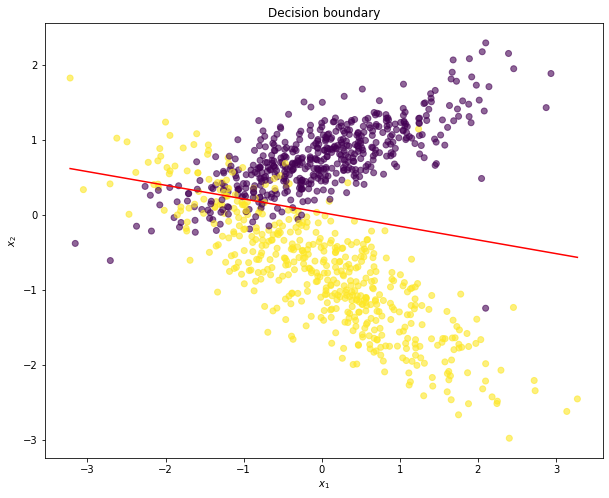

In [88]:
plot_decision_boundary(X, w, b)

### Make predictions for training set

The below function makes predictions for a set of data instances and thresholds the model output (which ranges from [0,1]) to a binary output (which has values of 0 or 1). If the model output is >= 0.5, we predict y=1, else we predict y=0.

In [89]:
def predict(X, w, b):
    # Calculate predictions using model parameters w, b
    preds = sigmoid(np.dot(X, w) + b)
    
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i >= 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [90]:
y_hat_train = predict(X, w, b)

### Plot the loss history

The below function takes a list of losses from the training history and plots them as a function of the number of iterations.

In [91]:
def plot_loss_history(losses, ax, title):
    ax.plot(range(1, len(losses)+1), losses)
    ax.set_xlabel('Number of epochs')
    ax.set_ylabel('Loss')
    ax.set_title(title)

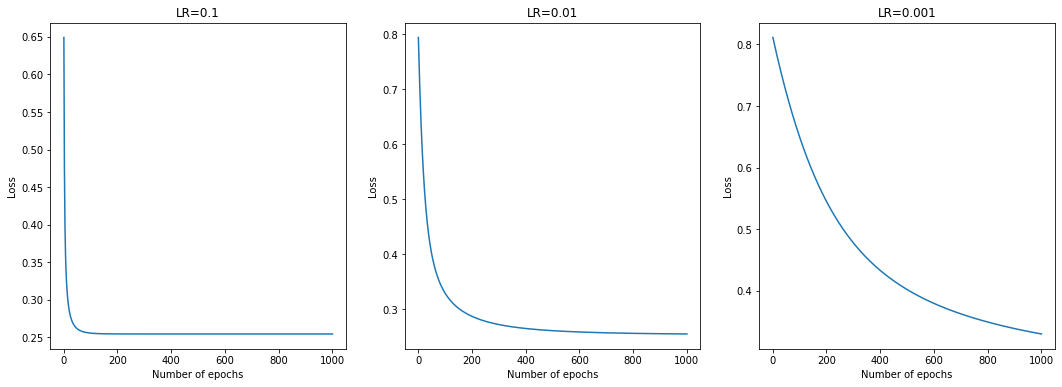

In [92]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))
plot_loss_history(loss_history_tenth, ax[0], 'LR=0.1')
plot_loss_history(loss_history, ax[1], 'LR=0.01')
plot_loss_history(loss_history_thousandth, ax[2], 'LR=0.001')

**Question 1: Try changing the learning rate to different values, e.g. 0.1, 0.01, and 0.001. What happens to the plot of the loss history as the learning rate increases?**

**Answer:**

As the learning rate increases, the loss curve drops down quicker i.e., it takes lesser number of epochs to reach the lowest loss.

### Compute training accuracy

Compute and print the accuracy on the training dataset.

In [93]:
from sklearn.metrics import accuracy_score

# YOUR CODE HERE
print(accuracy_score(y, y_hat_train))

0.902


## Logistic regression using sklearn

In this section, we'll implement logistic regression for the same classification task using scikit-learn instead of writing the code from scratch.

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
# Instantiate a logistic regression classifier and fit it to the training data
clf = LogisticRegression(random_state=0)
clf = clf.fit(X, y)

In [96]:
y_pred = clf.predict(X)

Compute and print the classification accuracy for the training set.

In [97]:
# YOUR CODE HERE
print(accuracy_score(y, y_pred))

0.902


### Summary

Now you've learned how to implement logistic regression from scratch in python as well as using scikit-learn. Using both methods we got the same classification accuracy on the training set.